In [1]:
import pandas as pd

df = pd.read_csv("C:/Users/asus/OneDrive/Desktop/jupyter/wfp_food_prices_pse.csv")
df

,date,region,city,market,latitude,longitude,category,commodity,unit,priceflag,pricetype,currency,price,usdprice
0,1/15/2007,Gaza Strip,Gaza,Gaza,31.506077,34.462746,cereals and tubers,Bread,KG,actual,Retail,ILS,2.00,0.4739
1,1/15/2007,Gaza Strip,Gaza,Gaza,31.506077,34.462746,cereals and tubers,Rice (long grain),KG,actual,Retail,ILS,13.00,3.0806
2,1/15/2007,Gaza Strip,Gaza,Gaza,31.506077,34.462746,cereals and tubers,"Rice (short grain, low quality, local)",KG,actual,Retail,ILS,4.00,0.9479
3,1/15/2007,Gaza Strip,Gaza,Gaza,31.506077,34.462746,cereals and tubers,Semolina,KG,actual,Retail,ILS,2.75,0.6517
4,1/15/2007,Gaza Strip,Gaza,Gaza,31.506077,34.462746,cereals and tubers,Wheat,KG,actual,Retail,ILS,2.65,0.6280
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26413,7/15/2024,West Bank,Ramallah and Albireh,West Bank,31.973144,35.329920,vegetables and fruits,Cauliflower,KG,actual,Retail,ILS,5.89,1.6316
26414,7/15/2024,West Bank,Ramallah and Albireh,West Bank,31.973144,35.329920,vegetables and fruits,Cucumbers (greenhouse),KG,actual,Retail,ILS,4.52,1.2521
26415,7/15/2024,West Bank,Ramallah and Albireh,West Bank,31.973144,35.329920,vegetables and fruits,Eggplants (large),KG,actual,Retail,ILS,3.65,1.0111
26416,7/15/2024,West Bank,Ramallah and Albireh,West Bank,31.973144,35.329920,vegetables and fruits,"Onions (dry, local)",KG,actual,Retail,ILS,4.06,1.1247


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26418 entries, 0 to 26417
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   date       26418 non-null  object 
 1   region     26418 non-null  object 
 2   city       26418 non-null  object 
 3   market     26418 non-null  object 
 4   latitude   26418 non-null  float64
 5   longitude  26418 non-null  float64
 6   category   26418 non-null  object 
 7   commodity  26418 non-null  object 
 8   unit       26418 non-null  object 
 9   priceflag  26418 non-null  object 
 10  pricetype  26418 non-null  object 
 11  currency   26418 non-null  object 
 12  price      26418 non-null  float64
 13  usdprice   26418 non-null  float64
dtypes: float64(4), object(10)
memory usage: 2.8+ MB


# 1. Data Inconsistency
# 1.1 market 

In [3]:
df['market'] = df['market'].replace({"Tulkarem": "West Bank",
                                     "Jenin" : "West Bank",
                                     "Qalqiliya" : "West Bank",
                                     "Nablus": "West Bank",
                                     "Bethlehem": "West Bank",  "Ramallah": "West Bank", "Hebron": "West Bank", "Jericho": "West Bank",
                                     "Gaza": "Gaza Strip","Gaza North": "Gaza Strip","Rafah": "Gaza Strip"  })
df['market'].value_counts()

market
West Bank     18182
Gaza Strip     8236
Name: count, dtype: int64

In [4]:
df['category'].value_counts()


category
vegetables and fruits    4626
meat, fish and eggs      4612
cereals and tubers       4353
milk and dairy           4209
miscellaneous food       3272
oil and fats             1878
pulses and nuts          1801
non-food                 1667
Name: count, dtype: int64

In [5]:
df[df['category']=='non-food']

,date,region,city,market,latitude,longitude,category,commodity,unit,priceflag,pricetype,currency,price,usdprice
891,5/15/2014,Gaza Strip,Gaza,Gaza Strip,31.506077,34.462746,non-food,Water (drinking),Cubic meter,actual,Retail,ILS,1.50,0.4335
904,5/15/2014,Gaza Strip,North Gaza,Gaza Strip,31.535061,34.483574,non-food,Water (drinking),Cubic meter,actual,Retail,ILS,1.50,0.4335
915,5/15/2014,West Bank,Bethlehem,West Bank,31.711758,35.202435,non-food,Water (drinking),Cubic meter,actual,Retail,ILS,4.22,1.2211
927,5/15/2014,West Bank,Hebron,West Bank,31.523630,35.093697,non-food,Water (drinking),Cubic meter,actual,Retail,ILS,5.00,1.4451
939,5/15/2014,West Bank,Jenin,West Bank,32.464635,35.293859,non-food,Water (drinking),Cubic meter,actual,Retail,ILS,4.22,1.2211
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26343,6/15/2024,West Bank,Ramallah and Albireh,West Bank,31.973144,35.329920,non-food,Water (drinking),Cubic meter,actual,Retail,ILS,3.88,1.0378
26373,7/15/2024,Gaza Strip,Kan Younis,Gaza Strip,31.346110,34.325730,non-food,Fuel (petrol-gasoline),L,actual,Retail,ILS,150.00,41.5512
26374,7/15/2024,Gaza Strip,Kan Younis,Gaza Strip,31.346110,34.325730,non-food,Water (drinking),Cubic meter,actual,Retail,ILS,1.33,0.3684
26404,7/15/2024,West Bank,Ramallah and Albireh,West Bank,31.973144,35.329920,non-food,Fuel (petrol-gasoline),L,actual,Retail,ILS,7.34,2.0332


In [6]:
df['unit'].value_counts()

unit
KG             18274
500 G           1663
3 L             1039
2 KG            1039
25 KG           1036
Cubic meter      949
L                826
1.8 KG           711
60 KG            511
50 KG            208
2.5 KG           119
380 G             43
Name: count, dtype: int64

# 1.2 Unit

In [7]:
df['factor'] = df['unit'].replace({"KG": 1,
                                     "500 G" : 0.5,
                                     '3 L' : 3,
                                     "2 KG": 2,
                                     "25 KG": 25,  "Cubic meter": 1, "L": 1, "1.8 KG": 1.8,
                                     "60 KG": 60,"50 KG": 50,"2.5 KG": 2.5,
                                     "380 G" : 0.38     
                                  })
df['factor'] = df['factor'].astype(float)
df['price'] = df['price'] / df['factor']
df['usdprice'] = df['usdprice'] / df['factor']

C:\Users\asus\AppData\Local\Temp\ipykernel_7856\2280743780.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['factor'] = df['unit'].replace({"KG": 1,


In [8]:
df

,date,region,city,market,latitude,longitude,category,commodity,unit,priceflag,pricetype,currency,price,usdprice,factor
0,1/15/2007,Gaza Strip,Gaza,Gaza Strip,31.506077,34.462746,cereals and tubers,Bread,KG,actual,Retail,ILS,2.00,0.4739,1.0
1,1/15/2007,Gaza Strip,Gaza,Gaza Strip,31.506077,34.462746,cereals and tubers,Rice (long grain),KG,actual,Retail,ILS,13.00,3.0806,1.0
2,1/15/2007,Gaza Strip,Gaza,Gaza Strip,31.506077,34.462746,cereals and tubers,"Rice (short grain, low quality, local)",KG,actual,Retail,ILS,4.00,0.9479,1.0
3,1/15/2007,Gaza Strip,Gaza,Gaza Strip,31.506077,34.462746,cereals and tubers,Semolina,KG,actual,Retail,ILS,2.75,0.6517,1.0
4,1/15/2007,Gaza Strip,Gaza,Gaza Strip,31.506077,34.462746,cereals and tubers,Wheat,KG,actual,Retail,ILS,2.65,0.6280,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26413,7/15/2024,West Bank,Ramallah and Albireh,West Bank,31.973144,35.329920,vegetables and fruits,Cauliflower,KG,actual,Retail,ILS,5.89,1.6316,1.0
26414,7/15/2024,West Bank,Ramallah and Albireh,West Bank,31.973144,35.329920,vegetables and fruits,Cucumbers (greenhouse),KG,actual,Retail,ILS,4.52,1.2521,1.0
26415,7/15/2024,West Bank,Ramallah and Albireh,West Bank,31.973144,35.329920,vegetables and fruits,Eggplants (large),KG,actual,Retail,ILS,3.65,1.0111,1.0
26416,7/15/2024,West Bank,Ramallah and Albireh,West Bank,31.973144,35.329920,vegetables and fruits,"Onions (dry, local)",KG,actual,Retail,ILS,4.06,1.1247,1.0


In [9]:
df2= pd.read_csv("C:/Users/asus/OneDrive/Desktop/jupyter/wfp_food_prices_pse.csv")
df2


,date,region,city,market,latitude,longitude,category,commodity,unit,priceflag,pricetype,currency,price,usdprice
0,1/15/2007,Gaza Strip,Gaza,Gaza,31.506077,34.462746,cereals and tubers,Bread,KG,actual,Retail,ILS,2.00,0.4739
1,1/15/2007,Gaza Strip,Gaza,Gaza,31.506077,34.462746,cereals and tubers,Rice (long grain),KG,actual,Retail,ILS,13.00,3.0806
2,1/15/2007,Gaza Strip,Gaza,Gaza,31.506077,34.462746,cereals and tubers,"Rice (short grain, low quality, local)",KG,actual,Retail,ILS,4.00,0.9479
3,1/15/2007,Gaza Strip,Gaza,Gaza,31.506077,34.462746,cereals and tubers,Semolina,KG,actual,Retail,ILS,2.75,0.6517
4,1/15/2007,Gaza Strip,Gaza,Gaza,31.506077,34.462746,cereals and tubers,Wheat,KG,actual,Retail,ILS,2.65,0.6280
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26413,7/15/2024,West Bank,Ramallah and Albireh,West Bank,31.973144,35.329920,vegetables and fruits,Cauliflower,KG,actual,Retail,ILS,5.89,1.6316
26414,7/15/2024,West Bank,Ramallah and Albireh,West Bank,31.973144,35.329920,vegetables and fruits,Cucumbers (greenhouse),KG,actual,Retail,ILS,4.52,1.2521
26415,7/15/2024,West Bank,Ramallah and Albireh,West Bank,31.973144,35.329920,vegetables and fruits,Eggplants (large),KG,actual,Retail,ILS,3.65,1.0111
26416,7/15/2024,West Bank,Ramallah and Albireh,West Bank,31.973144,35.329920,vegetables and fruits,"Onions (dry, local)",KG,actual,Retail,ILS,4.06,1.1247


In [10]:
df2[df2['unit']=='2 KG']

,date,region,city,market,latitude,longitude,category,commodity,unit,priceflag,pricetype,currency,price,usdprice
882,5/15/2014,Gaza Strip,Gaza,Gaza,31.506077,34.462746,"meat, fish and eggs",Eggs,2 KG,actual,Retail,ILS,13.00,3.7572
899,5/15/2014,Gaza Strip,North Gaza,Gaza North,31.535061,34.483574,"meat, fish and eggs",Eggs,2 KG,actual,Retail,ILS,13.00,3.7572
909,5/15/2014,West Bank,Bethlehem,Bethlehem,31.711758,35.202435,"meat, fish and eggs",Eggs,2 KG,actual,Retail,ILS,18.50,5.3468
921,5/15/2014,West Bank,Hebron,Hebron,31.523630,35.093697,"meat, fish and eggs",Eggs,2 KG,actual,Retail,ILS,15.46,4.4677
932,5/15/2014,West Bank,Jenin,Jenin,32.464635,35.293859,"meat, fish and eggs",Eggs,2 KG,actual,Retail,ILS,15.00,4.3353
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26267,5/15/2024,West Bank,Ramallah and Albireh,West Bank,31.973144,35.329920,"meat, fish and eggs",Eggs,2 KG,actual,Retail,ILS,15.53,4.2316
26298,6/15/2024,Gaza Strip,Kan Younis,Gaza Strip,31.346110,34.325730,"meat, fish and eggs",Eggs,2 KG,actual,Retail,ILS,55.75,14.9124
26329,6/15/2024,West Bank,Ramallah and Albireh,West Bank,31.973144,35.329920,"meat, fish and eggs",Eggs,2 KG,actual,Retail,ILS,18.42,4.9271
26360,7/15/2024,Gaza Strip,Kan Younis,Gaza Strip,31.346110,34.325730,"meat, fish and eggs",Eggs,2 KG,actual,Retail,ILS,32.00,8.8643


In [11]:
df[df['factor']== 2]

,date,region,city,market,latitude,longitude,category,commodity,unit,priceflag,pricetype,currency,price,usdprice,factor
882,5/15/2014,Gaza Strip,Gaza,Gaza Strip,31.506077,34.462746,"meat, fish and eggs",Eggs,2 KG,actual,Retail,ILS,6.500,1.87860,2.0
899,5/15/2014,Gaza Strip,North Gaza,Gaza Strip,31.535061,34.483574,"meat, fish and eggs",Eggs,2 KG,actual,Retail,ILS,6.500,1.87860,2.0
909,5/15/2014,West Bank,Bethlehem,West Bank,31.711758,35.202435,"meat, fish and eggs",Eggs,2 KG,actual,Retail,ILS,9.250,2.67340,2.0
921,5/15/2014,West Bank,Hebron,West Bank,31.523630,35.093697,"meat, fish and eggs",Eggs,2 KG,actual,Retail,ILS,7.730,2.23385,2.0
932,5/15/2014,West Bank,Jenin,West Bank,32.464635,35.293859,"meat, fish and eggs",Eggs,2 KG,actual,Retail,ILS,7.500,2.16765,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26267,5/15/2024,West Bank,Ramallah and Albireh,West Bank,31.973144,35.329920,"meat, fish and eggs",Eggs,2 KG,actual,Retail,ILS,7.765,2.11580,2.0
26298,6/15/2024,Gaza Strip,Kan Younis,Gaza Strip,31.346110,34.325730,"meat, fish and eggs",Eggs,2 KG,actual,Retail,ILS,27.875,7.45620,2.0
26329,6/15/2024,West Bank,Ramallah and Albireh,West Bank,31.973144,35.329920,"meat, fish and eggs",Eggs,2 KG,actual,Retail,ILS,9.210,2.46355,2.0
26360,7/15/2024,Gaza Strip,Kan Younis,Gaza Strip,31.346110,34.325730,"meat, fish and eggs",Eggs,2 KG,actual,Retail,ILS,16.000,4.43215,2.0


In [21]:
df['unit'] = df['unit'].replace({"KG": "KG",
                                     "500 G" : "KG",
                                     '3 L' : "L",
                                     "2 KG": "KG",
                                     "25 KG": "KG", "1.8 KG": "KG",
                                     "60 KG": "KG","50 KG": "KG","2.5 KG": "KG",
                                     "380 G" : "KG"   
                                  })
df['pricetype'].value_counts()

date
3/15/2017     341
10/15/2017    334
10/15/2018    334
7/15/2018     334
9/15/2018     334
             ... 
12/15/2013     10
3/15/2014       9
2/15/2014       9
1/15/2014       9
4/15/2014       9
Name: count, Length: 211, dtype: int64

In [13]:
df[df.duplicated()]

,date,region,city,market,latitude,longitude,category,commodity,unit,priceflag,pricetype,currency,price,usdprice,factor


In [14]:
df.isnull().sum()

date         0
region       0
city         0
market       0
latitude     0
longitude    0
category     0
commodity    0
unit         0
priceflag    0
pricetype    0
currency     0
price        0
usdprice     0
factor       0
dtype: int64

# 1. When did the food price monitoring begin in Gaza and West Bank?

In [15]:
df.groupby('region')['date'].min()

region
Gaza Strip    1/15/2007
West Bank     1/15/2015
Name: date, dtype: object

# 2. How do food prices in Gaza compare to the West Bank over the years?


In [30]:
print(df['date'].value_counts())

date
3/15/2017     341
10/15/2017    334
10/15/2018    334
7/15/2018     334
9/15/2018     334
             ... 
12/15/2013     10
3/15/2014       9
2/15/2014       9
1/15/2014       9
4/15/2014       9
Name: count, Length: 211, dtype: int64


In [40]:
df['year'] = df['date'].apply(lambda x: x.split('/')[2])
df

,date,region,city,market,latitude,longitude,category,commodity,unit,priceflag,pricetype,currency,price,usdprice,factor,year
0,1/15/2007,Gaza Strip,Gaza,Gaza Strip,31.506077,34.462746,cereals and tubers,Bread,KG,actual,Retail,ILS,2.00,0.4739,1.0,2007
1,1/15/2007,Gaza Strip,Gaza,Gaza Strip,31.506077,34.462746,cereals and tubers,Rice (long grain),KG,actual,Retail,ILS,13.00,3.0806,1.0,2007
2,1/15/2007,Gaza Strip,Gaza,Gaza Strip,31.506077,34.462746,cereals and tubers,"Rice (short grain, low quality, local)",KG,actual,Retail,ILS,4.00,0.9479,1.0,2007
3,1/15/2007,Gaza Strip,Gaza,Gaza Strip,31.506077,34.462746,cereals and tubers,Semolina,KG,actual,Retail,ILS,2.75,0.6517,1.0,2007
4,1/15/2007,Gaza Strip,Gaza,Gaza Strip,31.506077,34.462746,cereals and tubers,Wheat,KG,actual,Retail,ILS,2.65,0.6280,1.0,2007
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26413,7/15/2024,West Bank,Ramallah and Albireh,West Bank,31.973144,35.329920,vegetables and fruits,Cauliflower,KG,actual,Retail,ILS,5.89,1.6316,1.0,2024
26414,7/15/2024,West Bank,Ramallah and Albireh,West Bank,31.973144,35.329920,vegetables and fruits,Cucumbers (greenhouse),KG,actual,Retail,ILS,4.52,1.2521,1.0,2024
26415,7/15/2024,West Bank,Ramallah and Albireh,West Bank,31.973144,35.329920,vegetables and fruits,Eggplants (large),KG,actual,Retail,ILS,3.65,1.0111,1.0,2024
26416,7/15/2024,West Bank,Ramallah and Albireh,West Bank,31.973144,35.329920,vegetables and fruits,"Onions (dry, local)",KG,actual,Retail,ILS,4.06,1.1247,1.0,2024


Text(0.5, 1.0, 'Price vs Year')

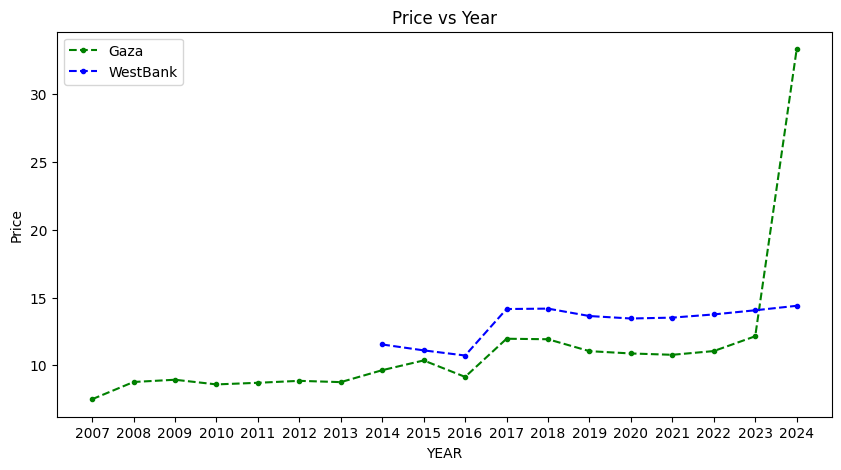

In [57]:
import matplotlib.pyplot as plt


fig, axes = plt.subplots(figsize=(10, 5))

filterWestBank =  df[df['region'] == 'West Bank']
filterGaza = df[df['region'] == 'Gaza Strip']

pricesWest = filterWestBank.groupby('year')['price'].mean()
pricesGaza = filterGaza.groupby('year')['price'].mean()
years = df['year'].unique()


axes.plot(pricesGaza, color="green", linestyle='dashed', marker=".", label="Gaza")
axes.plot(pricesWest, color="blue", linestyle='dashed', marker=".", label="WestBank")


axes.legend()

axes.set_xlabel("YEAR")
axes.set_ylabel("Price")
axes.set_title("Price vs Year")


# 3. What are the long-term price trends for key commodities (e.g., bread, rice, vegetables) in different regions (Gaza Strip vs. West Bank)?

In [58]:
df['commodity'].value_counts()

commodity
Bread                                     1127
Sugar                                     1039
Eggs                                      1039
Oil (maize)                               1039
Salt                                      1038
Tea                                       1038
Rice (small grain, imported)              1036
Water (drinking)                           949
Milk (pasteurized)                         915
Meat (chicken)                             897
Chickpeas                                  889
Lentils                                    869
Labaneh                                    846
Oil (olive)                                839
Milk (powder)                              830
Yogurt                                     817
Cheese (goat)                              801
Fish (frozen)                              794
Meat (goat, with bones)                    785
Meat (beef)                                780
Tomatoes (greenhouse)                      767
Ban

DTypePromotionError: The DType <class 'numpy.dtypes._PyFloatDType'> could not be promoted by <class 'numpy.dtypes.StrDType'>. This means that no common DType exists for the given inputs. For example they cannot be stored in a single array unless the dtype is `object`. The full list of DTypes is: (<class 'numpy.dtypes.StrDType'>, <class 'numpy.dtypes.StrDType'>, <class 'numpy.dtypes._PyFloatDType'>)

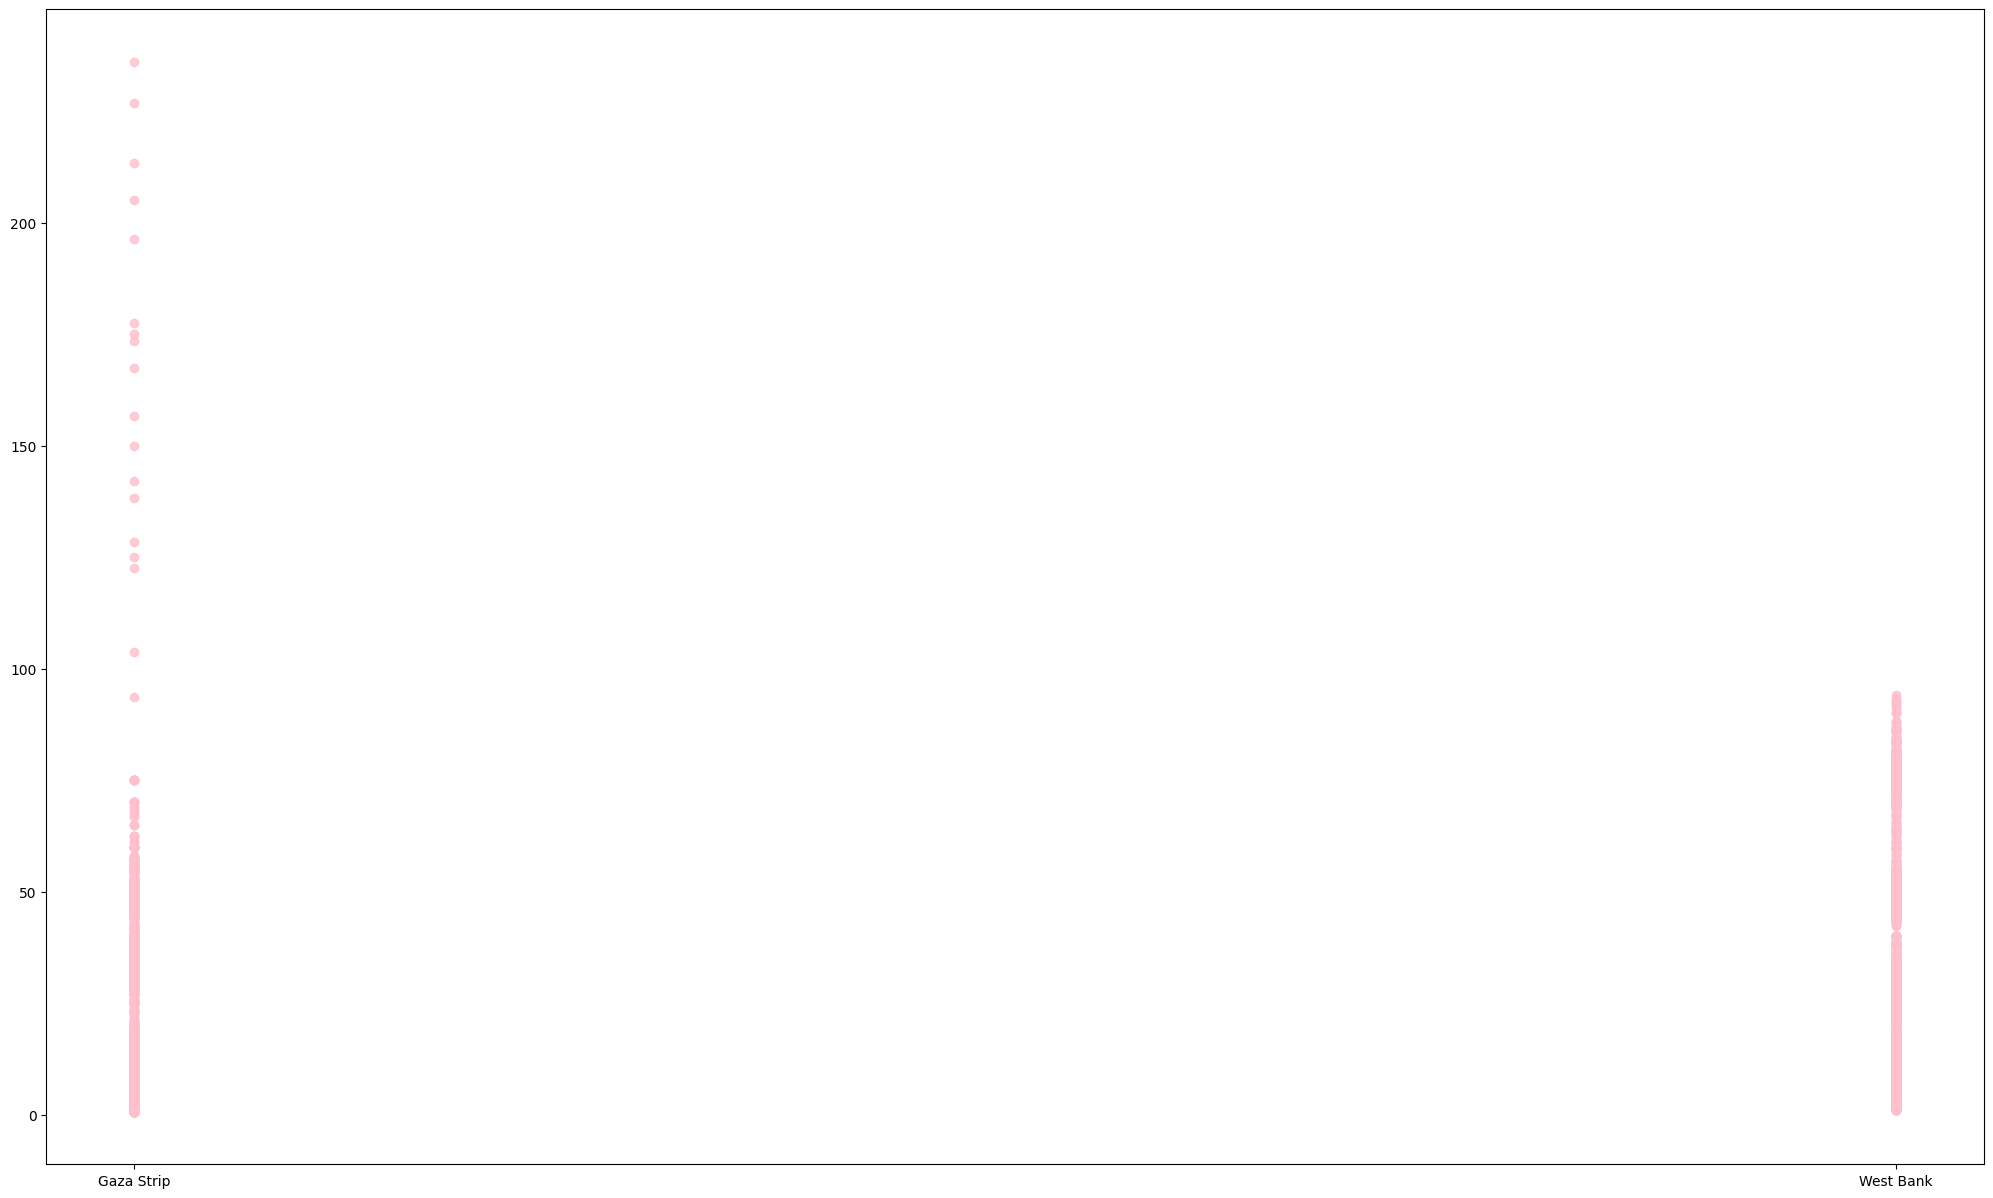

In [61]:
import seaborn as sns
fig, axes = plt.subplots(figsize=(25,15))
sns.regplot(ax=axes, data=df, x = 'region', y="price", color='pink');
sns.regplot(ax=axes, data=df, x = 'region', y="commodity", color='purple');

# 4. When Wheat flour hit the maximum price?

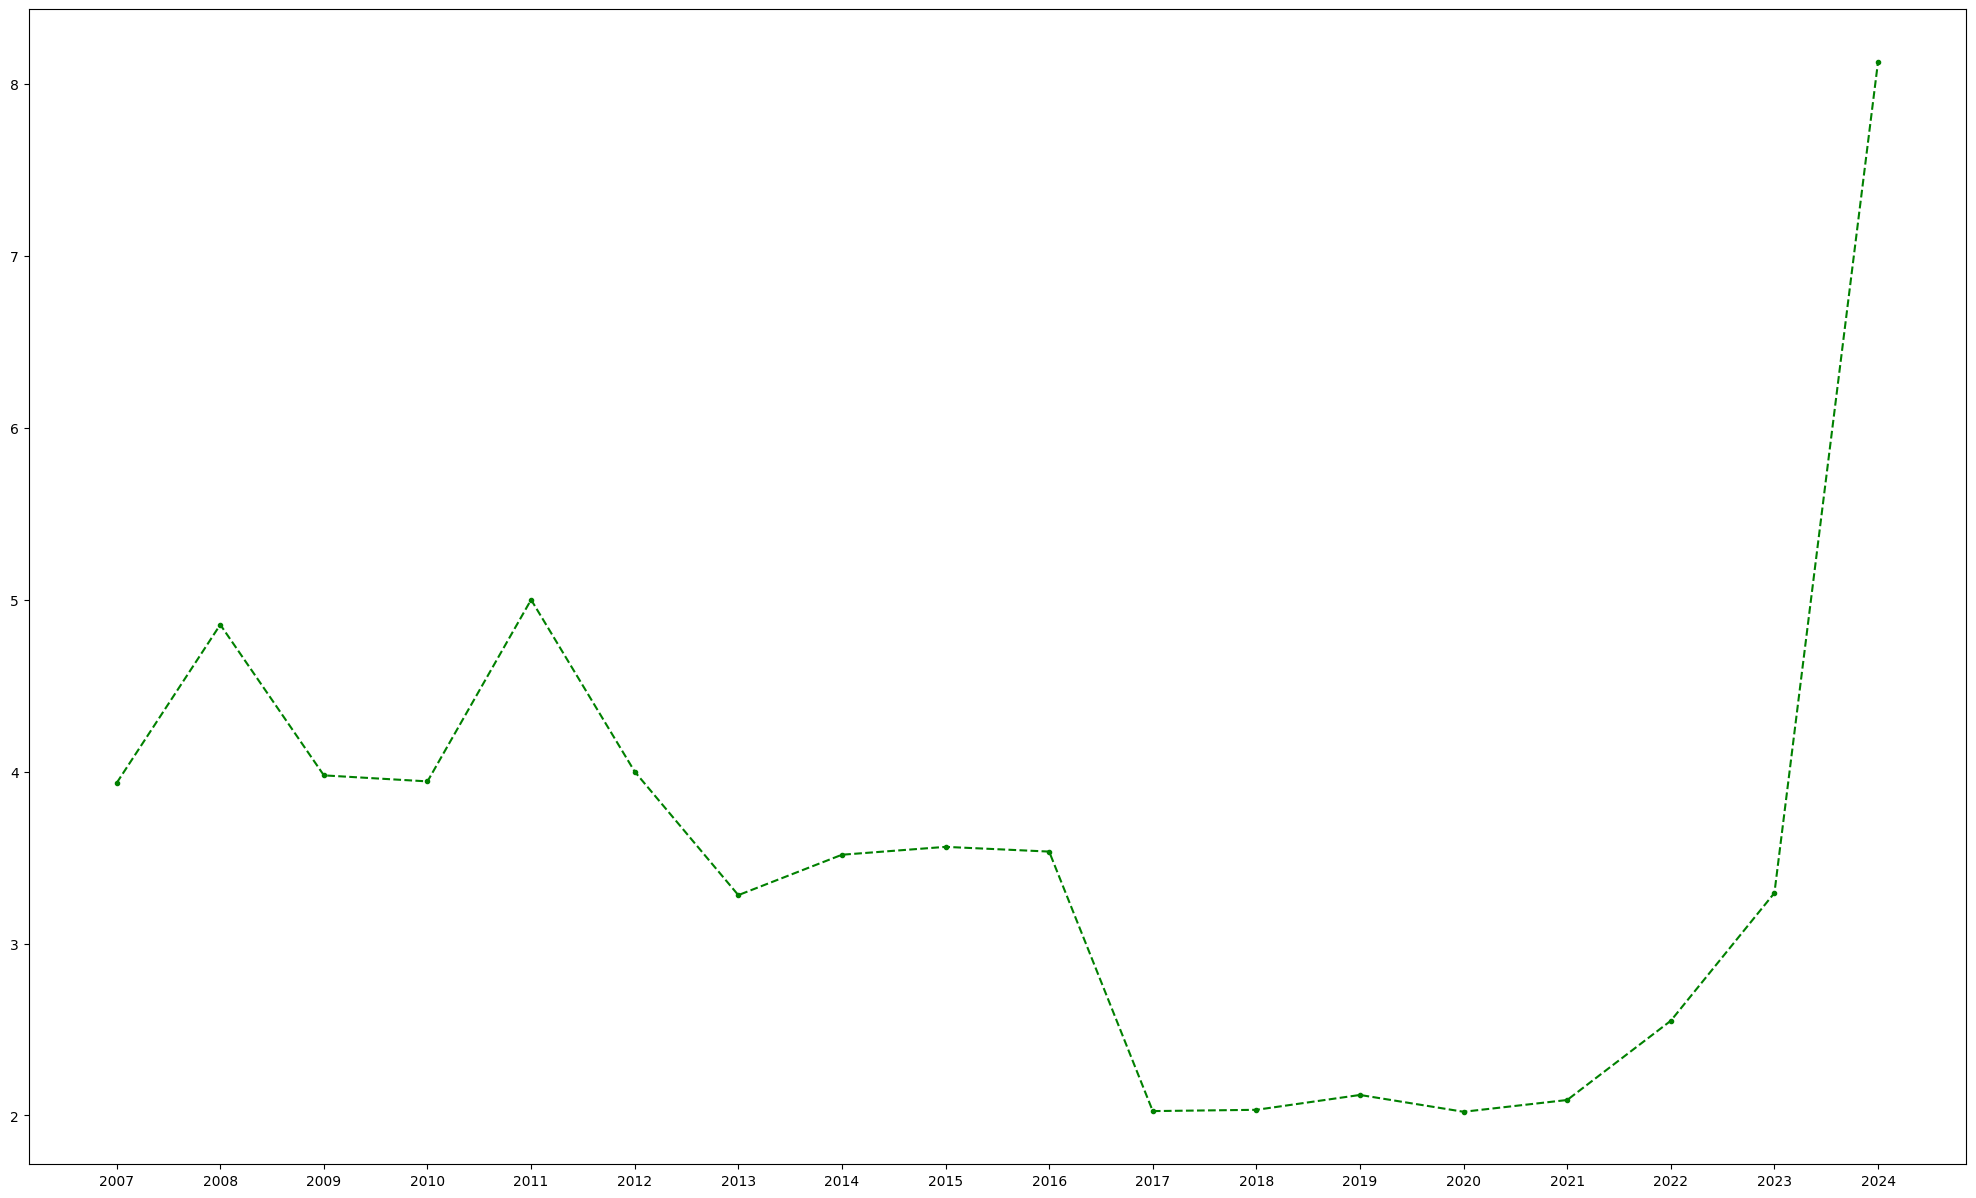

In [85]:
fig, axes = plt.subplots(figsize=(25,15))
filtered_wheat = df[(df['commodity'] == 'Wheat flour') | (df['commodity'] == 'Wheat flour (locally processed)')]
price = filtered_wheat.groupby('year')['price'].mean()

axes.plot(price, color="green", linestyle='dashed', marker=".", label="Gaza")

# axes.plot(dates, color="green", linestyle='dashed', marker=".", label="Gaza")

In [89]:
filtered_wheat.groupby('year')['price'].mean()

year
2007    3.934167
2008    4.855000
2009    3.978333
2010    3.943333
2011    5.000000
2012    4.000000
2013    3.281667
2014    3.516667
2015    3.562500
2016    3.535000
2017    2.025456
2018    2.032867
2019    2.119298
2020    2.021445
2021    2.089963
2022    2.550847
2023    3.294275
2024    8.129359
Name: price, dtype: float64

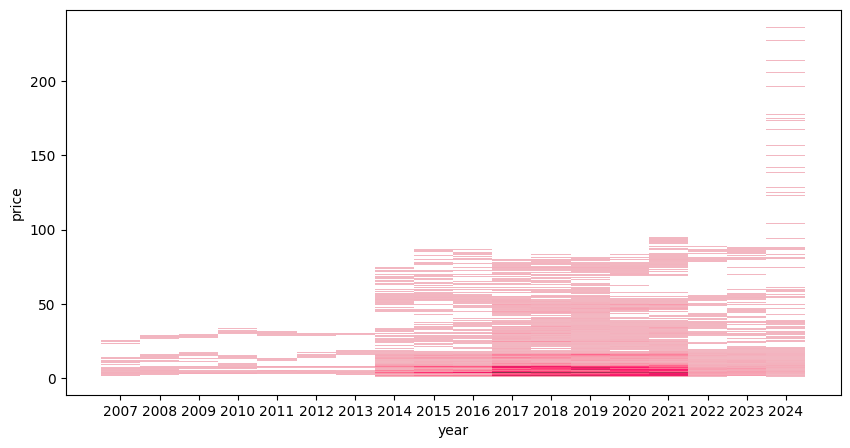

In [92]:
import seaborn as sns
fig, axes = plt.subplots(figsize=(10,5))
sns.histplot(data=df, x = 'year', y="price", color='pink');

In [ ]:
fig, axes = plt.subplots(figsize=(25,15)

axes.plot(price, color="green", linestyle='dashed', marker=".", label="Gaza")

# 5. Which categories of food have experienced the highest price increases over time?

In [127]:
df.groupby('category')['price'].std()

category
cereals and tubers        1.989732
meat, fish and eggs      24.798682
milk and dairy           14.537117
miscellaneous food        6.536833
non-food                  8.861103
oil and fats             11.985959
pulses and nuts           2.049182
vegetables and fruits     2.179169
Name: price, dtype: float64

In [93]:
df['category'].value_counts()

category
vegetables and fruits    4626
meat, fish and eggs      4612
cereals and tubers       4353
milk and dairy           4209
miscellaneous food       3272
oil and fats             1878
pulses and nuts          1801
non-food                 1667
Name: count, dtype: int64

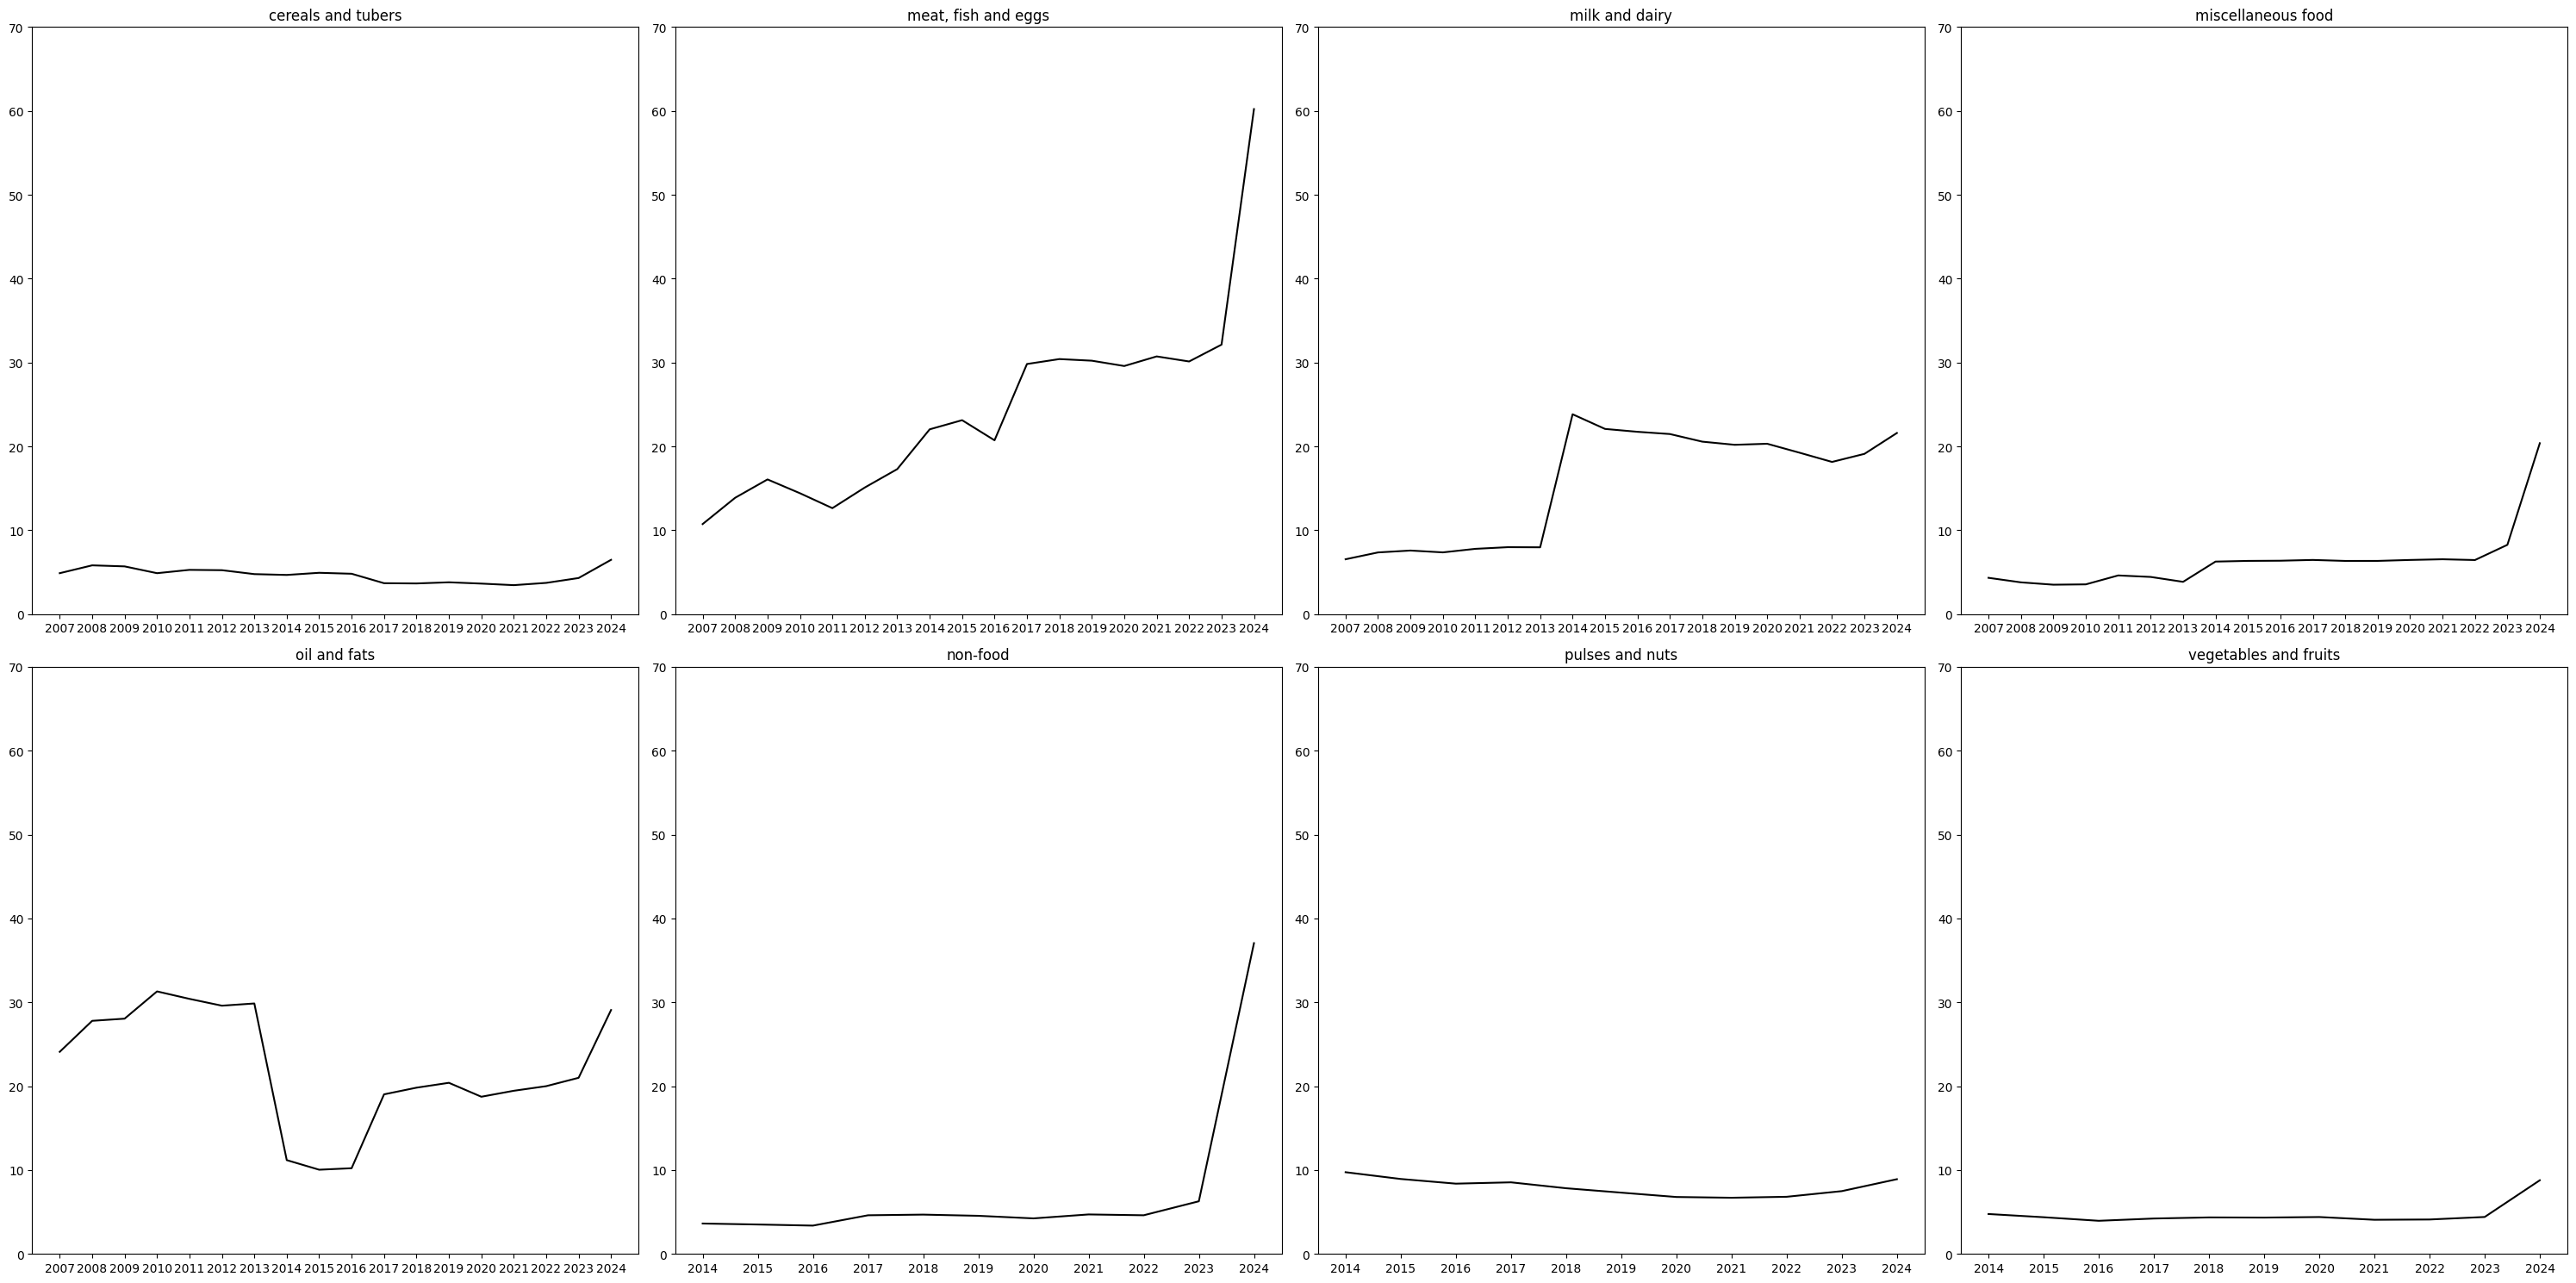

In [130]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 4, figsize=(30, 15))

axes = axes.ravel()

regions = df['category'].unique()
years = df['year'].unique()

for i in range(len(regions)):
    r = regions[i]
    category_df = df[df['category'] == r].groupby('year')['price'].mean()  
    
    axes[i].plot(category_df.index, category_df.values, color='black')
    axes[i].set_title(f"{r}")
    axes[i].set_ylim(0, 70) 

fig.tight_layout()


# 6. Which commodities have experienced the highest price volatility (extreme changes in price) over time?

In [116]:
len(df['commodity'].value_counts())

39

In [131]:
df.groupby('commodity')['price'].std().sort_values()

commodity
Semolina                                   0.448146
Rice (small grain, imported)               0.479335
Sugar (white)                              0.591080
Oranges (big size)                         0.597183
Milk (pasteurized)                         0.627582
Bread                                      0.703601
Wheat                                      0.736387
Wheat flour                                0.808227
Salt                                       0.828725
Lentils                                    0.994761
Rice (short grain, low quality, local)     1.008151
Potatoes (medium size)                     1.208826
Labaneh                                    1.218713
Water (drinking)                           1.414297
Tomatoes (greenhouse)                      1.513264
Bananas (medium size)                      1.572316
Oil (maize)                                1.583596
Cucumbers (greenhouse)                     1.659694
Cauliflower                                1.878611
Ri

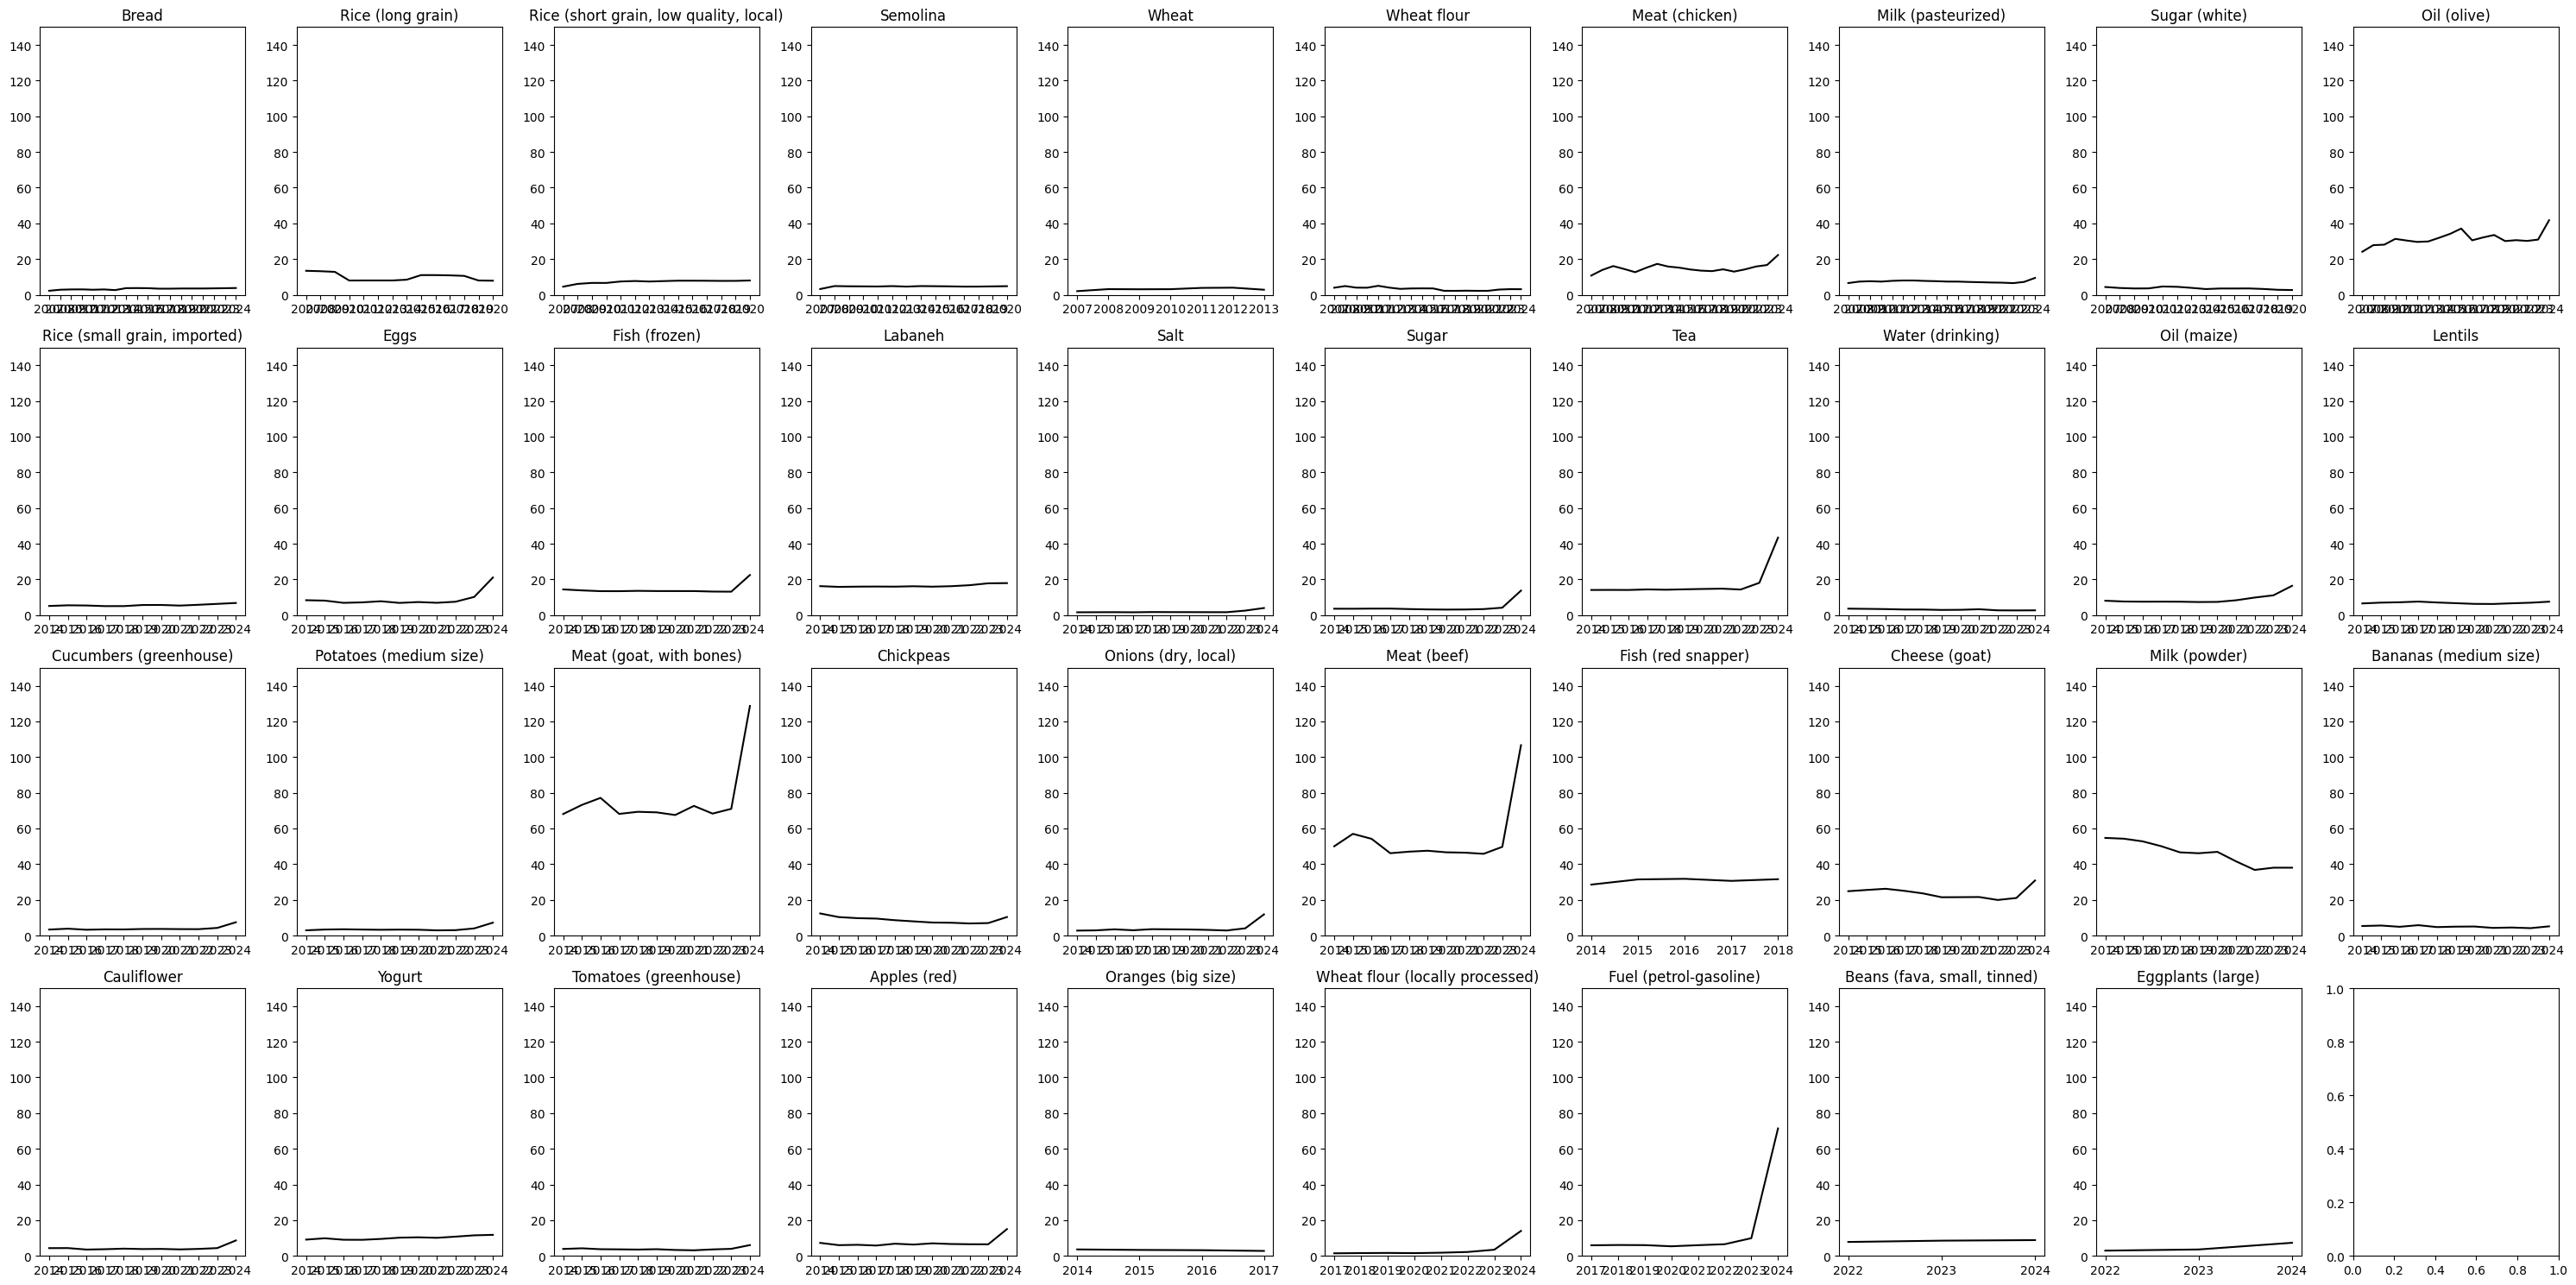

In [123]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(4, 10, figsize=(30, 15))

axes = axes.ravel()

regions = df['commodity'].unique()
years = df['year'].unique()

for i in range(len(regions)):
    r = regions[i]
    category_df = df[df['commodity'] == r].groupby('year')['price'].mean()  
    
    axes[i].plot(category_df.index, category_df.values, color='black')
    axes[i].set_title(f"{r}")
    axes[i].set_ylim(0, 150) 

fig.tight_layout()
